In [1]:
import torch
import torch.nn as nn
import numpy
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
from sklearn.datasets import fetch_olivetti_faces

BATCH_SIZE = 10
epochs = 20
lr = 0.01

olivetti_faces = fetch_olivetti_faces(data_home=r'./face_data',shuffle=True)
images = torch.tensor(olivetti_faces.data)
targets = torch.tensor(olivetti_faces.target)
dataset = [(img,lbl) for img,lbl in zip(images,targets)]
dataloader = DataLoader(dataset,batch_size=BATCH_SIZE,shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 损失函数
loss_fn = nn.CrossEntropyLoss()

In [2]:
model = nn.Sequential(
    nn.Linear(4096, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192,16438),
    nn.BatchNorm1d(16438),
    nn.ReLU(),
    nn.Linear(16438,1024),
    nn.BatchNorm1d(1024),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(1024,40)
).to(device)

In [3]:
def trainer(model,opt="Adam"):
    # 优化器
    if opt == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    elif opt == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    elif opt == 'ASGD':
        optimizer = torch.optim.ASGD(model.parameters(), lr=lr)
    else:
        return None
    
    loss_arr = []
    # 模型训练
    for epoch in range(epochs):
        # 提取训练数据
        for data, target in dataloader:
            target = torch.tensor(target).to(device)
            data = data.to(device)
            # 前向运算
            output = model(data)
            # 计算损失
            loss = loss_fn(output, target.long())
            # 反向传播
            optimizer.zero_grad() # 所有参数梯度清零
            loss.backward() # 计算梯度，保存到.grad
            optimizer.step() # 更新参数
            
        print(f'Epoch {epoch}, Loss {loss.item()}')
        loss_arr.append(loss.item())
    
    return loss_arr

In [4]:
loss_arr_Adam = trainer(model, 'Adam') 

C:\Users\lisheng\AppData\Local\Temp\ipykernel_34824\3894487022.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 3.1591999530792236
Epoch 1, Loss 3.90301251411438
Epoch 2, Loss 1.265663504600525
Epoch 3, Loss 1.4072188138961792
Epoch 4, Loss 1.3552587032318115
Epoch 5, Loss 3.057387590408325
Epoch 6, Loss 0.724852442741394
Epoch 7, Loss 0.7207584977149963
Epoch 8, Loss 0.32604295015335083
Epoch 9, Loss 0.6422821283340454
Epoch 10, Loss 0.5297107696533203
Epoch 11, Loss 0.4071553349494934
Epoch 12, Loss 0.7559205293655396
Epoch 13, Loss 0.6491107940673828
Epoch 14, Loss 0.08877785503864288
Epoch 15, Loss 0.7867392301559448
Epoch 16, Loss 0.06889619678258896
Epoch 17, Loss 0.21615341305732727
Epoch 18, Loss 0.4277302324771881
Epoch 19, Loss 0.3044830858707428


In [5]:
loss_arr_SGD = trainer(model, 'SGD') 

C:\Users\lisheng\AppData\Local\Temp\ipykernel_34824\3894487022.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 0.027201319113373756
Epoch 1, Loss 1.0535452365875244
Epoch 2, Loss 1.8391335010528564
Epoch 3, Loss 0.6506711840629578
Epoch 4, Loss 0.009677908383309841
Epoch 5, Loss 0.11109336465597153
Epoch 6, Loss 0.004806562326848507
Epoch 7, Loss 0.09959708899259567
Epoch 8, Loss 0.19755783677101135
Epoch 9, Loss 0.0031952939461916685
Epoch 10, Loss 0.009430306032299995
Epoch 11, Loss 0.00096795306308195
Epoch 12, Loss 0.01021582167595625
Epoch 13, Loss 0.2493647038936615
Epoch 14, Loss 0.24273915588855743
Epoch 15, Loss 0.6952874660491943
Epoch 16, Loss 0.0032133583445101976
Epoch 17, Loss 0.16613957285881042
Epoch 18, Loss 0.6106429100036621
Epoch 19, Loss 0.9358941316604614


In [6]:
loss_arr_ASGD = trainer(model, 'ASGD') 

C:\Users\lisheng\AppData\Local\Temp\ipykernel_34824\3894487022.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(target).to(device)


Epoch 0, Loss 0.053351979702711105
Epoch 1, Loss 0.5772276520729065
Epoch 2, Loss 0.6878695487976074
Epoch 3, Loss 0.0635211318731308
Epoch 4, Loss 0.015678709372878075
Epoch 5, Loss 0.004915202967822552
Epoch 6, Loss 0.06625518202781677
Epoch 7, Loss 0.010447309352457523
Epoch 8, Loss 0.0007063440280035138
Epoch 9, Loss 0.0303727388381958
Epoch 10, Loss 0.0036981801968067884
Epoch 11, Loss 0.004956844262778759
Epoch 12, Loss 0.006205006968230009
Epoch 13, Loss 0.188630610704422
Epoch 14, Loss 0.14791372418403625
Epoch 15, Loss 0.09457005560398102
Epoch 16, Loss 0.07211834192276001
Epoch 17, Loss 0.006426276173442602
Epoch 18, Loss 0.1509624421596527
Epoch 19, Loss 0.012262067757546902


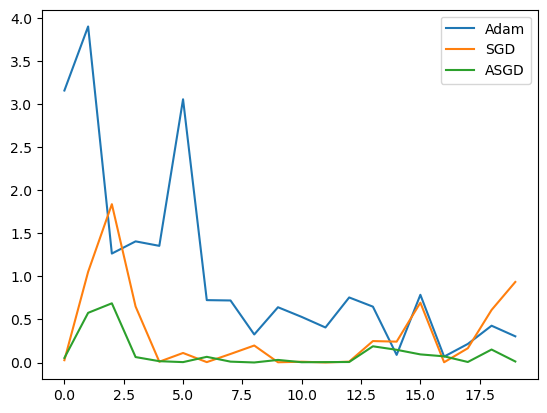

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_arr_Adam,label="Adam")
plt.plot(loss_arr_SGD,label="SGD")
plt.plot(loss_arr_ASGD,label="ASGD")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()